In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=495a7bdda3ab6a9703c634119bde9118


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | bethel
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | bambous virieux
Processing Record 4 of Set 13 | kaitangata
Processing Record 5 of Set 13 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 13 | arraial do cabo
Processing Record 7 of Set 13 | provideniya
Processing Record 8 of Set 13 | tasiilaq
Processing Record 9 of Set 13 | constitucion
Processing Record 10 of Set 13 | lompoc
Processing Record 11 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 13 | jamestown
Processing Record 13 of Set 13 | sao francisco de assis
Processing Record 14 of Set 13 | saskylakh
Processing Record 15 of Set 13 | busselton
Processing Record 16 of Set 13 | comodoro rivadavia
Processing Record 17 of Set 13 | torbay
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | isangel
Processing Record 20 of Set 13 | vikramasingapuram
Processing Record 21 of Set 13 | sangar
Processing Record 22 o

City not found. Skipping...
Processing Record 34 of Set 16 | rabo de peixe
Processing Record 35 of Set 16 | egvekinot
Processing Record 36 of Set 16 | bilibino
Processing Record 37 of Set 16 | haines junction
Processing Record 38 of Set 16 | sinnamary
Processing Record 39 of Set 16 | xinmin
Processing Record 40 of Set 16 | port moresby
Processing Record 41 of Set 16 | sibolga
Processing Record 42 of Set 16 | tessalit
Processing Record 43 of Set 16 | tiksi
Processing Record 44 of Set 16 | cessnock
Processing Record 45 of Set 16 | souillac
Processing Record 46 of Set 16 | la asuncion
Processing Record 47 of Set 16 | mrirt
City not found. Skipping...
Processing Record 48 of Set 16 | okahandja
Processing Record 49 of Set 16 | matata
Processing Record 50 of Set 16 | severo-kurilsk
Processing Record 1 of Set 17 | milingimbi
City not found. Skipping...
Processing Record 2 of Set 17 | asau
Processing Record 3 of Set 17 | kaka
Processing Record 4 of Set 17 | leningradskiy
Processing Record 5 of

Processing Record 20 of Set 20 | kushiro
Processing Record 21 of Set 20 | caraquet
Processing Record 22 of Set 20 | bocaranga
City not found. Skipping...
Processing Record 23 of Set 20 | chifeng
Processing Record 24 of Set 20 | upernavik
Processing Record 25 of Set 20 | ilhabela
Processing Record 26 of Set 20 | changqing
Processing Record 27 of Set 20 | lingao
Processing Record 28 of Set 20 | artyk
City not found. Skipping...
Processing Record 29 of Set 20 | channahon
Processing Record 30 of Set 20 | prince rupert
Processing Record 31 of Set 20 | saquarema
Processing Record 32 of Set 20 | acutzilapan
City not found. Skipping...
Processing Record 33 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 20 | buzmeyin
Processing Record 35 of Set 20 | lebu
Processing Record 36 of Set 20 | penha
Processing Record 37 of Set 20 | harper
Processing Record 38 of Set 20 | chernyshevskiy
Processing Record 39 of Set 20 | lulea
Processing Record 40 of Set 20 | kiunga
Proc

Processing Record 8 of Set 24 | luanda
Processing Record 9 of Set 24 | toftir
City not found. Skipping...
Processing Record 10 of Set 24 | roebourne
Processing Record 11 of Set 24 | faya
Processing Record 12 of Set 24 | malanje
Processing Record 13 of Set 24 | ostrovnoy
Processing Record 14 of Set 24 | barentu
Processing Record 15 of Set 24 | sao sebastiao do cai
Processing Record 16 of Set 24 | young
Processing Record 17 of Set 24 | tisul
Processing Record 18 of Set 24 | panjab
Processing Record 19 of Set 24 | nyuksenitsa
Processing Record 20 of Set 24 | beira
Processing Record 21 of Set 24 | tarko-sale
Processing Record 22 of Set 24 | bathsheba
Processing Record 23 of Set 24 | ilulissat
Processing Record 24 of Set 24 | murgab
Processing Record 25 of Set 24 | aquiraz
Processing Record 26 of Set 24 | unye
City not found. Skipping...
Processing Record 27 of Set 24 | umm kaddadah
Processing Record 28 of Set 24 | simitli
Processing Record 29 of Set 24 | tekeli
Processing Record 30 of Set 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,37.00,63,1,3.85,US,2020-02-18 05:55:29
1,Ushuaia,-54.80,-68.30,48.20,70,75,8.05,AR,2020-02-18 05:55:29
2,Bambous Virieux,-20.34,57.76,82.99,74,40,9.17,MU,2020-02-18 05:55:30
3,Kaitangata,-46.28,169.85,62.01,92,48,1.99,NZ,2020-02-18 05:55:30
4,Arraial Do Cabo,-22.97,-42.03,77.90,87,82,25.37,BR,2020-02-18 05:55:30
5,Provideniya,64.38,-173.30,10.40,78,90,17.90,RU,2020-02-18 05:55:30
6,Tasiilaq,65.61,-37.64,28.40,68,100,27.51,GL,2020-02-18 05:55:31
7,Constitucion,-35.33,-72.42,57.38,56,0,8.93,CL,2020-02-18 05:55:31
8,Lompoc,34.64,-120.46,57.99,71,1,5.82,US,2020-02-18 05:55:31
9,Jamestown,42.10,-79.24,41.00,59,90,11.41,US,2020-02-18 05:55:31


In [10]:
# Reorder the columns in the dataframe
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-02-18 05:55:29,41.37,-73.41,37.00,63,1,3.85
1,Ushuaia,AR,2020-02-18 05:55:29,-54.80,-68.30,48.20,70,75,8.05
2,Bambous Virieux,MU,2020-02-18 05:55:30,-20.34,57.76,82.99,74,40,9.17
3,Kaitangata,NZ,2020-02-18 05:55:30,-46.28,169.85,62.01,92,48,1.99
4,Arraial Do Cabo,BR,2020-02-18 05:55:30,-22.97,-42.03,77.90,87,82,25.37
5,Provideniya,RU,2020-02-18 05:55:30,64.38,-173.30,10.40,78,90,17.90
6,Tasiilaq,GL,2020-02-18 05:55:31,65.61,-37.64,28.40,68,100,27.51
7,Constitucion,CL,2020-02-18 05:55:31,-35.33,-72.42,57.38,56,0,8.93
8,Lompoc,US,2020-02-18 05:55:31,34.64,-120.46,57.99,71,1,5.82
9,Jamestown,US,2020-02-18 05:55:31,42.10,-79.24,41.00,59,90,11.41


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

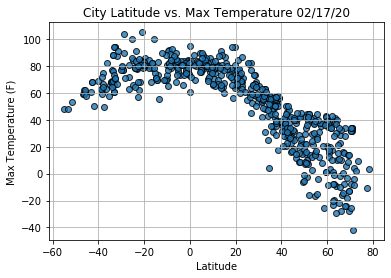

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

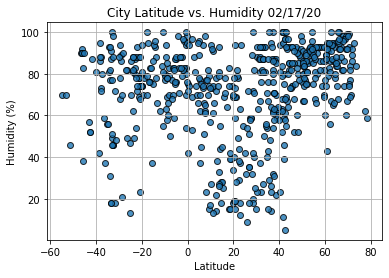

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

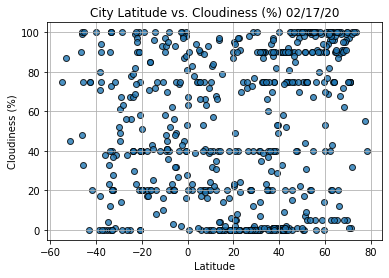

In [15]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

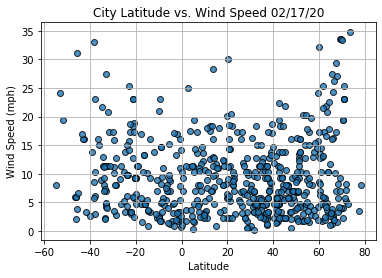

In [16]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [43]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    #add at the end of the function
    plt.title(title)
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

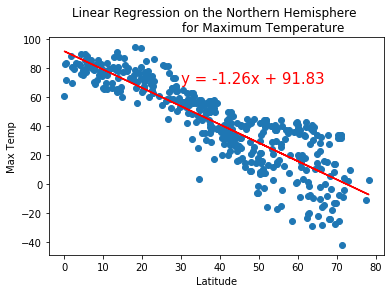

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(30,70))


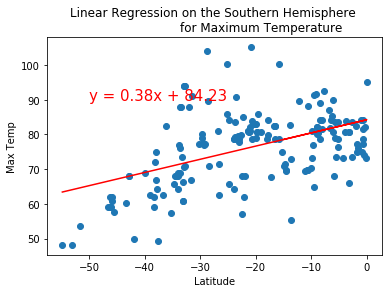

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

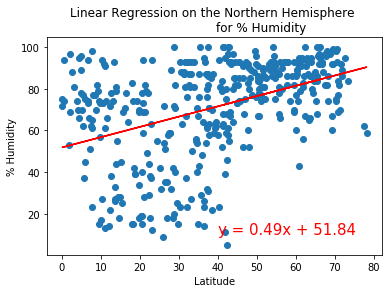

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

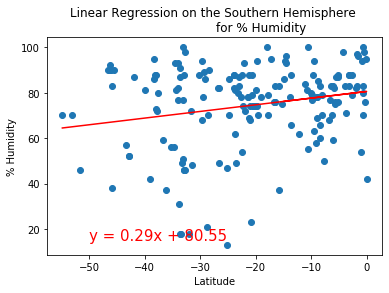

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

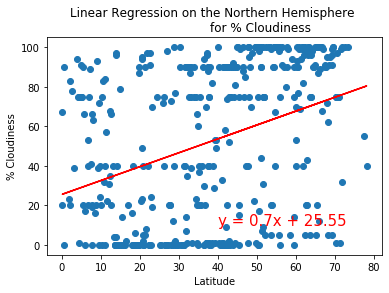

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))

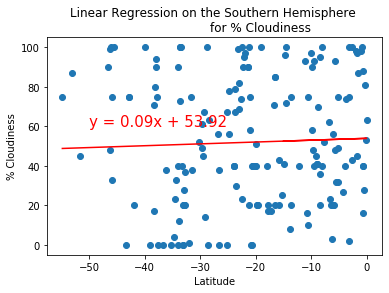

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

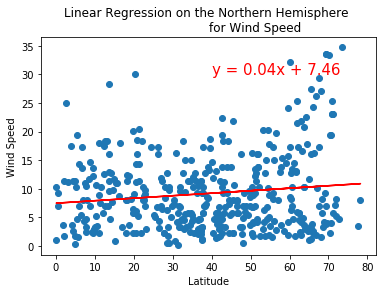

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,30))

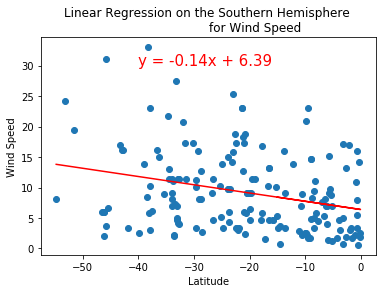

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-40,30))